In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [66]:
TCGA = pd.read_csv('TCGA_data.csv')

#### BLCA - BC
#### PAAD - PC
#### KICH,KIRC,KIRP-RC

In [67]:
TCGA.y.value_counts()

Normal    1706
KIRC       528
PRAD       492
BLCA       408
KIRP       288
KICH        66
Name: y, dtype: int64

In [68]:
TCGA.loc[(TCGA.y == 'BLCA'),'y'] = 'BC'
TCGA.loc[(TCGA.y == 'PAAD'),'y'] = 'PC'
TCGA.loc[(TCGA.y == 'KICH'),'y'] = 'RC'
TCGA.loc[(TCGA.y == 'KIRC'),'y'] = 'RC'
TCGA.loc[(TCGA.y == 'KIRP'),'y'] = 'RC'

In [69]:
TCGA.y.value_counts()

Normal    1706
RC         882
PRAD       492
BC         408
Name: y, dtype: int64

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
from sklearn.svm import SVC
svm1 = SVC()

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True, random_state=0)

In [15]:
TCGA.head()

,cyto.1p36.32,cyto.1p36.31,cyto.1p36.23,cyto.1p36.22,cyto.1p36.21,cyto.1p36.13,cyto.1p36.12,cyto.1p36.11,cyto.1p35.3,cyto.1p35.2,...,cyto.9q32,cyto.9q33.1,cyto.9q33.2,cyto.9q33.3,cyto.9q34.11,cyto.9q34.12,cyto.9q34.13,cyto.9q34.2,cyto.9q34.3,y
0,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,...,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,BC
1,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,...,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,Normal
2,0.4150,0.4150,0.4150,0.4150,0.4150,0.4150,0.4150,-0.2961,0.9639,-0.2736,...,-0.2716,-0.2716,-0.2716,-0.2716,-0.3456,-0.3456,0.2685,-0.3587,-0.3587,BC
3,-0.0006,-0.0006,-0.0006,-0.0006,0.0033,0.0033,0.0033,0.0033,0.0033,0.0033,...,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,Normal
4,-0.0130,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,...,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,Normal


In [17]:
for i, (idx_train, idx_cv) in enumerate(cv.split(TCGA)):
    df_train = TCGA.iloc[idx_train]
    df_cv = TCGA.iloc[idx_cv]
    
    x_train = df_train.drop(['y'], axis=1)
    y_train = df_train['y']
    
    x_cv = df_cv.drop(['y'], axis=1)
    y_cv = df_cv['y']
    
    print('[K =',i,']')
    print('-----------svm1-----------')
    svm1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, svm1.predict(x_train)), accuracy_score(y_cv, svm1.predict(x_cv))))
    
    print('--------rf1--------')
    rf1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, rf1.predict(x_train)), accuracy_score(y_cv, rf1.predict(x_cv))))
    

[K = 0 ]
-----------svm1-----------
train accurcacy = 0.8551971326164874, cv accurcacy = 0.8510028653295129
--------rf1--------
train accurcacy = 0.9931899641577061, cv accurcacy = 0.9097421203438395
[K = 1 ]
-----------svm1-----------
train accurcacy = 0.8548387096774194, cv accurcacy = 0.8853868194842407
--------rf1--------
train accurcacy = 0.9956989247311828, cv accurcacy = 0.9183381088825215
[K = 2 ]
-----------svm1-----------
train accurcacy = 0.864516129032258, cv accurcacy = 0.8409742120343839
--------rf1--------
train accurcacy = 0.9960573476702509, cv accurcacy = 0.8868194842406877
[K = 3 ]
-----------svm1-----------
train accurcacy = 0.864206377642422, cv accurcacy = 0.8407460545193687
--------rf1--------
train accurcacy = 0.9964170548190613, cv accurcacy = 0.9024390243902439
[K = 4 ]
-----------svm1-----------
train accurcacy = 0.8609817269795772, cv accurcacy = 0.8550932568149211
--------rf1--------
train accurcacy = 0.9957004657828735, cv accurcacy = 0.9196556671449068


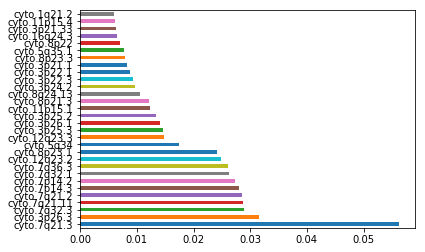

In [18]:
feat_importances = pd.Series(rf1.feature_importances_, index=x_train.columns)
feat_importances.nlargest(30).plot(kind='barh')

## K100

In [91]:
BC_100 = pd.read_csv('BC_32ea_k100_cyto.csv')
Normal_100 = pd.read_csv('Normal_21ea_k100_cyto.csv')
PC_100 = pd.read_csv('PC_20ea_k100_cyto.csv')
RC_100 = pd.read_csv('RC_20ea_k100_cyto.csv')

In [92]:
#drop person id
BC_100.drop('Unnamed: 0', axis = 1, inplace = True)
Normal_100.drop('Unnamed: 0', axis = 1, inplace = True)
PC_100.drop('Unnamed: 0', axis = 1, inplace = True)
RC_100.drop('Unnamed: 0', axis = 1, inplace = True)

In [93]:
BC_100['cancer'] = 'BC'
Normal_100['cancer'] = 'normal'
PC_100['cancer'] = 'PC'
RC_100['cancer'] = "RC"

K100 = pd.concat([BC_100,Normal_100,PC_100,RC_100], axis = 0)

In [94]:
rf2 = RandomForestClassifier()
svm2 = SVC()

In [95]:
K15.dropna(inplace=True)

### TCGA 모델로 소변데이터(K100) predict

In [96]:
K100.head()

,id,cyto.10p11.1,cyto.10p11.21,cyto.10p11.22,cyto.10p11.23,cyto.10p12.1,cyto.10p12.2,cyto.10p12.31,cyto.10p12.32,cyto.10p12.33,...,cyto.9q33.1,cyto.9q33.2,cyto.9q33.3,cyto.9q34.11,cyto.9q34.12,cyto.9q34.13,cyto.9q34.2,cyto.9q34.3,<NA>,cancer
0,B001,0.181000,-0.019967,0.044536,-0.026000,0.018065,0.00490,0.048000,0.084,-0.042857,...,0.015217,-0.044152,-0.004636,0.014333,0.0116,-0.004737,-0.019571,-0.022065,-0.7450,BC
1,B002,0.127000,0.010733,0.031250,0.048600,0.084413,0.05160,0.092889,0.102,-0.012857,...,-0.043478,-0.046000,-0.007386,-0.009233,-0.0136,-0.060474,0.027714,0.002290,0.2550,BC
2,B003,0.004000,0.007567,0.024964,0.081200,-0.011391,0.03605,-0.050194,-0.093,-0.059857,...,-0.158783,-0.193576,-0.075977,-0.106667,-0.0114,-0.072421,-0.127714,-0.168903,-0.1360,BC
3,B004,0.135667,0.061467,-0.061286,-0.071733,0.070522,0.06270,0.020556,-0.002,0.050857,...,-0.019326,0.012515,-0.009591,0.016667,0.0438,0.019947,0.011500,0.031387,0.0100,BC
4,B006,-0.251000,-0.134700,-0.175750,-0.165800,-0.112522,-0.06670,-0.127972,0.026,-0.198429,...,-0.074109,0.024758,0.097000,0.018667,0.1170,0.058368,0.038571,0.020065,-0.4595,BC


In [104]:
K100.dropna(inplace=True)

In [105]:
TCGA2 = TCGA.drop(list(set(TCGA.columns) - set(K100.columns)), axis = 1)

In [106]:
K100_2 = K100.drop(list(set(K100.columns) - set(TCGA.columns)), axis = 1)

In [107]:
K100['cancer'].value_counts()

BC        32
normal    21
PC        19
RC        16
Name: cancer, dtype: int64

In [108]:
x_train = TCGA2
y_train = TCGA['y']

x_test = K100_2
y_test = K100['cancer']

In [109]:
print('-----------svm2-----------')
svm2.fit(x_train, y_train)
print("train accurcacy = {}, urine accurcacy = {}".format(accuracy_score(y_train, svm2.predict(x_train)), accuracy_score(y_test, svm2.predict(x_test))))

print('--------rf2--------')
rf2.fit(x_train, y_train)
print("train accurcacy = {}, urine accurcacy = {}".format(accuracy_score(y_train, rf2.predict(x_train)), accuracy_score(y_test, rf2.predict(x_test))))


[K = 4 ]
-----------svm2-----------
train accurcacy = 0.867545871559633, cv accurcacy = 0.07954545454545454
--------rf2--------
train accurcacy = 0.9942660550458715, cv accurcacy = 0.2727272727272727
